In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [35]:
def sum_columns_values(dataframe_name):
    sum_columns_value = dataframe_name.sum(axis=0)
    return sum_columns_value

In [36]:
def sum_row_values(dataframe_name):
    sum_row_values = dataframe_name.sum(axis=1)
    return sum_row_values

In [37]:
listings_df = pd.read_csv("./listings.csv")

In [38]:
room_type_set = set(listings_df['room_type'])

In [39]:
entire_home_df = listings_df.query("room_type=='Entire home/apt'")['reviews_per_month']

In [40]:
private_home_df = listings_df.query("room_type=='Private room'")['reviews_per_month']

In [41]:
shared_home_df = listings_df.query("room_type=='Shared room'")['reviews_per_month']

1. How do you start to host on Airbnb?

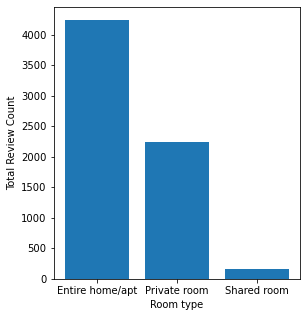

In [42]:
#Make a plot by room_type with their total review count
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.xlabel('Room type')
plt.ylabel('Total Review Count')
list_room_type_df = ['Entire home/apt','Private room','Shared room']
list_reviews_total = [sum_columns_values(entire_home_df),
                      sum_columns_values(private_home_df),
                      sum_columns_values(shared_home_df)]
plt.bar(list_room_type_df,list_reviews_total)
plt.show()